# PROCESS CSV FILE WITH ANGLES

In [ ]:
!pwd

In [23]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import os
import cv2
import numpy as np
import csv
import time
print('-----packages loaded-----')
plt.style.use('ggplot')

-----packages loaded-----


### Walk to subfolder to grab csv files

In [2]:
os.chdir('collected_data/youtube_files/')

In [3]:
import glob

filelist = []
for subfolder in next(os.walk('.'))[1]:
    os.chdir(subfolder)
    for subsubfolder in next(os.walk('.'))[1]:
        os.chdir(subsubfolder)
        csv_file = glob.glob('*.csv')
        filelist.append(os.path.join(subfolder,subsubfolder,csv_file[0]))
        #test = pd.read_csv()
        #test.head()
        #!pwd
        os.chdir('..')
    os.chdir('..')   

### GET ALL CSV FILE NAMES & STORE THEM IN LIST

In [ ]:
filelist

### PROCESS CSV DATA FRAMES of transition and final pose (warrior 2 left front) 

### ADD POSE LABEL 
* 1: warrior 2 left front
* 0: transition into pose

In [4]:
def append_pose_labels_to_df(df, pose):
    length = len(df['a1'])
    print('The length of the dataframe is:', length)
    #append label to pose if pose true set label to one else to zero (no pose/transition)
    if(pose==True):
        df.loc[:,'pose'] = pd.Series(np.ones(length),index=df.index)
    else:
         df.loc[:,'pose'] = pd.Series(np.zeros(length),index=df.index)
    return df

### Substract reference angles from columns
180,  180, 90,  180, 160, 90, 90 ?, 90?

In [5]:
total_ref_angle_sum = (180 +  180 + 90 +  180 + 160 + 90 + 90 + 90)

In [6]:

def get_dif_between_ref_and_real(df):
    tmp=0
    tmp2=0

    ref_list = [180,  180, 90,  180, 160, 90, 90, 90]
    for jj in range(0,8):
         df.loc[:, 'error a' + str(jj+1)] = abs(df.iloc[:,jj]-ref_list[jj])
         tmp = tmp + abs(df.iloc[:,jj]-ref_list[jj])#/ref_list[jj]
         #tmp2 = tmp2 + abs(df.iloc[:,jj]-ref_list[jj])#/ref_list[jj]
    df.loc[:,'total error'] = tmp
    df.loc[:,'total error %'] = 100*tmp/total_ref_angle_sum
    return df
        

In [ ]:

total_ref_angle_sum

### Get difference

#### If the total error absolute is greater than 8xtolerance than predicts BAD POSE and gives corrections

In [7]:
def built_matrix(filename, flag):
    #flag pose=true, transition=false
    print('The following file is processed ', filename)
    file = pd.read_csv(filename)
    append_pose_labels_to_df(file, flag)
    processed_file = get_dif_between_ref_and_real(file)
    return processed_file



In [8]:
csv_0 = built_matrix(filelist[0],True)
csv_1 = built_matrix(filelist[1],False)
csv_2 = built_matrix(filelist[2],True)
csv_3 = built_matrix(filelist[3],False)
csv_4 = built_matrix(filelist[4],True)

The following file is processed  Warrior2YogaPoseYogaWithAdriene/w2_left/w2_left.csv
The length of the dataframe is: 7
The following file is processed  JessamynStanleys8MinuteYogaforSelfLoveHealth/transition/transition.csv
The length of the dataframe is: 30
The following file is processed  JessamynStanleys8MinuteYogaforSelfLoveHealth/w2_left/w2_left.csv
The length of the dataframe is: 20
The following file is processed  iyengar/transition/transition.csv
The length of the dataframe is: 44
The following file is processed  iyengar/w2_left/w2_left.csv
The length of the dataframe is: 51


In [ ]:
print('Total number of transitions', 30 + 44)

In [ ]:
print('Total number of good poses',7 + 20 + 51)

Jessy good pose

In [ ]:
csv_1.head()

In [ ]:
csv_2.head()

### Lets standardize the data.

In [ ]:
#df_new['a1'].agg(['mean'])[0]


In [ ]:
#abs(df_new['a1'] - df_new['a1'].agg(['mean'])[0])/df_new['a1'].agg(['std'])[0]

### Bring all data frames together

In [9]:
df = csv_0.append(csv_1) 
df = df.append(csv_2)

In [10]:
df = df.append(csv_3)

In [11]:
df_new = df.append(csv_4)

In [12]:
df_new

,a1,a2,a3,a4,a5,a6,a7,a8,pose,error a1,error a2,error a3,error a4,error a5,error a6,error a7,error a8,total error,total error %
0,172.578487,174.975641,115.918825,171.506891,138.294341,103.008539,89.605441,100.823105,1.0,7.421513,5.024359,25.918825,8.493109,21.705659,13.008539,0.394559,10.823105,92.789669,8.753742
1,178.112834,175.882261,123.135207,172.951340,137.076203,107.163493,89.301620,91.186369,1.0,1.887166,4.117739,33.135207,7.048660,22.923797,17.163493,0.698380,1.186369,88.160813,8.317058
2,176.623881,175.198291,123.157369,173.990676,137.135389,106.255353,90.776501,97.770389,1.0,3.376119,4.801709,33.157369,6.009324,22.864611,16.255353,0.776501,7.770389,95.011374,8.963337
3,175.571723,179.312451,119.031191,174.025786,138.314064,103.308923,88.922407,102.612670,1.0,4.428277,0.687549,29.031191,5.974214,21.685936,13.308923,1.077593,12.612670,88.806352,8.377958
4,172.395940,176.102420,114.007713,171.500938,135.456918,106.832060,89.736709,102.359386,1.0,7.604060,3.897580,24.007713,8.499062,24.543082,16.832060,0.263291,12.359386,98.006232,9.245871
5,176.988067,175.388417,125.657369,172.827715,138.400240,110.917443,92.640723,98.906678,1.0,3.011933,4.611583,35.657369,7.172285,21.599760,20.917443,2.640723,8.906678,104.517775,9.860167
6,173.199239,179.795601,122.629402,173.969153,138.286074,105.326790,90.613814,100.443300,1.0,6.800761,0.204399,32.629402,6.030847,21.713926,15.326790,0.613814,10.443300,93.763239,8.845589
0,115.168888,89.768814,164.649751,156.603312,160.072215,133.916596,51.523644,60.770546,0.0,64.831112,90.231186,74.649751,23.396688,0.072215,43.916596,38.476356,29.229454,364.803359,34.415411
1,99.503399,89.701774,161.514241,157.949691,158.328918,135.401358,58.984391,63.324534,0.0,80.496601,90.298226,71.514241,22.050309,1.671082,45.401358,31.015609,26.675466,369.122891,34.822914
2,94.051986,124.558667,151.713796,154.018599,165.394488,114.758127,58.970872,50.881975,0.0,85.948014,55.441333,61.713796,25.981401,5.394488,24.758127,31.029128,39.118025,329.384312,31.073992


# END

In [ ]:
df_new['total error'].groupby(df_new['pose']).agg(['count'])

In [ ]:
# true negative: predicts no pose and its no pose
true_negatives = 74
true_positives = 78

In [ ]:
total_ref_angle_sum

In [ ]:
df_new.count()

### Loop 

In [ ]:
df_new.iloc[151,17]

### Get False Positive and False Negative Rate

In [13]:
true_positives = []
true_negatives = []
tolerance = []

false_positives = []
false_negatives = []
#loop for different tolerances jj
for jj in range(0,180):
    #set rates initially to zero
    tp=0
    tn=0
    fp=0
    fn=0
    #loop through all rows
    for kk in range(0,152):
        tmp = 1
        #loop through all angle errors of each row
        for error_aj in range(9, 17):
            if (df_new.iloc[kk,error_aj]< jj):
                tmp= tmp * 1
            else:
                tmp = tmp*0
        #final tmp either 0 or 1 is prediction of pose within the tolerance jj
        #compare to labels in image
        if(tmp + df_new.iloc[kk,8]==2):
            #print('test',tp)
            tp = tp +1
            #print('true positives',tmp, df_new.iloc[kk,8] )
        elif(tmp + df_new.iloc[kk,8]==0):
            tn = tn +1
            #print('true negatives',tmp,df_new.iloc[kk,8])      
        elif(tmp <df_new.iloc[kk,8]):
            fn = fn + 1
            #print(fn)
            #print('false negatives',kk,jj,fn,tmp,df_new.iloc[kk,8])
        elif(tmp >df_new.iloc[kk,8]):
            fp = fp + 1
            #print('false positives',tmp,df_new.iloc[kk,8])
    #list_kk.append(tmp)
    #print(tp+tn+fp +fn, jj, kk)
    true_positives.append(tp)
    true_negatives.append(tn)
    false_positives.append(fp)
    false_negatives.append(fn)
    tolerance.append(jj)

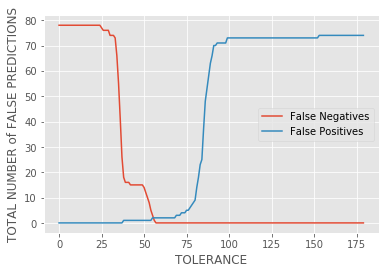

In [24]:
import matplotlib.pyplot as plt
plt.plot(tolerance,false_negatives, '-',label='False Negatives')

plt.plot(tolerance,false_positives,'-', label='False Positives')

plt.xlabel('TOLERANCE')
plt.ylabel('TOTAL NUMBER of FALSE PREDICTIONS')


plt.legend()

In [ ]:
true_positives

In [ ]:
true_negatives

In [ ]:
false_positives

In [ ]:
false_negatives

In [ ]:
#col 9: a1 error col 16: a8 error
#ref_list = [180,  180, 90,  180, 160, 90, 90, 90]

predicted_is_pose=[]   
for jj in range(0,180):
    var = []
    #loop through all errors in the angles, i.e.a1 to a8 and compare each to tolerance jj
    for angle_error in range(9, 17):
        #count for each angle how many rows are smaller than tolerance jj
        var.append(df_new[df_new.iloc[:,angle_error]< jj].count()[0])
    #take minimum count of all angles for fixed jj, since when one angle in pose is wrong than pose is wrong
    predicted_is_pose.append(min(var))  

In [ ]:
true_positives = 78 
predicted_is_pose

# False positive ratio (or false alarm ratio)

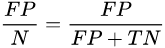

FP : number of false positives

TN :number of true negatives 

N=FP+TN is the total number of negatives.

### Different Definition of Correct Pose

* instead of looking at errors of individual angles one could also look at total sum
* this would have the disadvantage that a pose where everything is perfect except that the arm has an error of 90 degrees is in the same categorie as a pose where the errors of all limbs add up to 90 degrees.
* 


In [ ]:
true_negatives = 74 # true negative: predicts no pose and its no pose
true_positives = 78 #
counted_good_poses = []
tolerance = []
false_negatives = []
false_positives = []
tol_in_perc = []


#for jj in range(0, total_ref_angle_sum):
for jj in range(0, 400):
    #screen through different tolerance rates
    tol_in_perc.append(100*(jj/total_ref_angle_sum))
    tolerance.append(jj)
    #df_new['total error']#>tolerance].agg(['count'])
    #count how many poses are predicted as good in dependence of tolerance
    counted_good_poses.append(df_new[df_new.iloc[:,17]<tolerance[jj]].count()[0])
    predicted_positives = counted_good_poses[jj]
    print('Predicted Positives', predicted_positives)
    predicted_negatives = (true_positives+true_negatives - predicted_positives)
    if(predicted_positives<true_positives):
        false_negatives.append(abs(predicted_positives- true_positives))
    else:
        false_negatives.append(0)
    if(predicted_negatives<true_negatives):
        #was bei negativen fehlt ist bei positiven falsch
        false_positives.append(abs(predicted_negatives-true_negatives))
    else:
        false_positives.append(0)


In [ ]:
true_negatives = 74 # true negative: predicts no pose and its no pose
true_positives = 78# true positives: predicts pose and its pose

#counted_good_poses = presc
#tolerance = 0 model says no pose is good -> all poses bad False positived=0 False negatives =78
#counted_good_poses[0]

In [ ]:
#while()
#false_negatives = [abs(x - true_positives) for x in counted_good_poses]
#false_negatives[0]

In [ ]:
#but in reality 78 poses good, therefore 
#false_positives = [abs(x - true_negatives) for x in counted_good_poses]

#False positive muss 0 sein, wird ja gar keiner positiv predicted
#false_positives[0]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tol_in_perc,false_negatives, '-',label='False Negatives')

plt.plot(tol_in_perc,false_positives,'-', label='False Positives')

plt.xlabel('TOLERANCE in %')
plt.ylabel('TOTAL NUMBER of FALSE PREDICTIONS')


plt.legend()

In [ ]:
import seaborn as sns
sns.set(color_codes=True)


sns.distplot(df_new['total error %'],  kde=False, bins=50)

In [ ]:
sns.distplot(df_new['total error']);